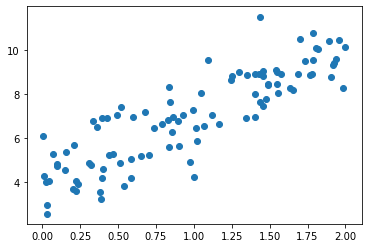

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

X = x.reshape(-1, 1)

plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

![](http://windmissing.github.io/images/2019/79.png)

In [42]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [43]:
def dJ(theta, X_b, y):
    ret = np.empty(len(theta))
    ret[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        ret[i] = (X_b.dot(theta) - y).dot(X_b[:, 1])
    
    return ret * 2 / len(X_b)

In [50]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [51]:
X_b = np.hstack([np.ones((len(x), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)
theta

array([4.02145786, 3.00706277])

### 封装线性回归算法

In [18]:
import numpy as np
from sklearn.metrics import r2_score

class LinearRegression:
    
    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_ = None
        self.interception_ = None
        self._theta = None
        
    def fit_normal(self, X_train, y_train):
        """根据训练数据集X_train, y_train训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], "the size of X_train must be equal to the size of y_train"
        
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    def fit_gd(self, X_train, y_train, eta=0.01, n_iters = 1e4):
        """根据训练数据集X_train, y_train，使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], "the size of X_train must be equal to the size of y_train"
        
        def J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta))**2) / len(X_b)
            except:
                return float('inf')
            
        def dJ(theta, X_b, y):
            ret = np.empty(len(theta))
            ret[0] = np.sum(X_b.dot(theta) - y)
            for i in range(1, len(theta)):
                ret[i] = (X_b.dot(theta) - y).dot(X_b[:, 1])

            return ret * 2 / len(X_b)
        
        def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
            theta = initial_theta
            i_iter = 0
            while i_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                i_iter += 1
            return theta
        
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
        
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, "must fit before predict"
        assert X_predict.shape[1] == len(self.coef_), "the feature number of X_predict must equal to X_train"
        
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        """根据测试数据集X_test, y_test确定当前模型的准确度"""
        
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)
        
    def __repr__(self):
        return "LinearRegression()"

In [19]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [20]:
lin_reg.coef_

array([3.00706277])

In [21]:
lin_reg.interception_

4.021457858204859

In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
x = boston.data
y = boston.target
x = x[y < 50.0]
y = y[y < 50.0]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [24]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)
lin_reg2.score(X_test, y_test)

C:\Users\yinahe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\yinahe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in square
C:\Users\yinahe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\yinahe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in multiply


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').